<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400 >
<h1 align=center><font size = 5>Hacktiv8 Intermediate Python for Data Science</font></h1>

The Dogs vs Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat. A large set of images of cats and dogs. There are 1738 corrupted images that are dropped. The dogs vs cats dataset refers to a dataset used for a Kaggle machine learning competition held in 2013. 

In this assignment, you have to demonstrate:

1. How to load and prepare photos of dogs and cats for modeling.
2. How to develop a convolutional neural network for photo classification with Tensorflow and improve model performance.

Criteria - Meet Expectations

Image Classification Model - Mengimplementasikan CNN dengan Tensorflow untuk membuat Image Classification model

Preprocessing - Student Melakukan Preproses Dataset Sebelum Membuat Model.

Apakah Kode Berjalan Tanpa Ada Eror? - Seluruh Kode Berfungsi Dan Dibuat Dengan Benar.

# Load Data

In [1]:
import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce 930MX, pci bus id: 0000:01:00.0, compute capability: 5.0



In [9]:
import os

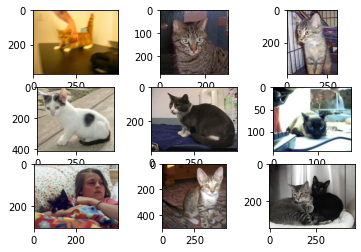

In [3]:
# plot cat photos from the dogs vs cats dataset
import pandas as pd
from matplotlib import pyplot
from matplotlib.image import imread
from tensorflow import keras
# define location of dataset
folder = 'kagglecatsanddogs_3367a/PetImages/Cat/'
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [4]:
# # skip
# # load dogs vs cats dataset, reshape and save to a new file
# from os import listdir
# from numpy import asarray
# from numpy import save
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# # define location of dataset
# folder_cat = 'dataset_dogs_vs_cats_v2/train/cats/'
# # 'kagglecatsanddogs_3367a/PetImages/Cat/'

# folder_dog = 'dataset_dogs_vs_cats_v2/test/dogs/'
# # 'kagglecatsanddogs_3367a/PetImages/Dog/'
# photos, labels = list(), list()
# # enumerate files in the 
# counter=0
# for file in listdir(folder_cat):
#     print("processing "+file+" : "+str(counter))
#     output = 1.0
#     photo = load_img(folder_cat + file, target_size=(200, 200))
#     photo = img_to_array(photo)
# #   photos.append(photo)
# #   labels.append(output)
#     counter=counter+1

# print('Total: '+str(counter))

# # for file in listdir(folder_dog):
# #   output = 0.0
# #   photo = load_img(folder_dog + file, target_size=(200, 200))
# #   photo = img_to_array(photo)
# #   photos.append(photo)
# #   labels.append(output)
 
# # # convert to a numpy arrays
# # photos = asarray(photos)
# # labels = asarray(labels)
# # print(photos.shape, labels.shape)
# # save the reshaped photos
# # save('dogs_vs_cats_photos.npy', photos)
# # save('dogs_vs_cats_labels.npy', labels)

# Organize Dataset Directory

In [16]:
# organize dataset into a useful structure
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# dataset_home = 'drive/MyDrive/Colab Notebooks/PetImages/dataset_dogs_vs_cats/'
dataset_home = 'dataset_dogs_vs_cats_v2/'
subdirs = ['train/', 'test/']
# seed random number generator
seed(22)
# define ratio of images to use for validation
val_ratio = 0.25

## Create Directories

In [17]:
# create directories
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

## Copy Data to New Directory

In [14]:
src_dir_cat = 'kagglecatsanddogs_3367a/PetImages/Cat/'
src_dir_dog = 'kagglecatsanddogs_3367a/PetImages/Dog/'
cat_count = len([name for name in os.listdir(src_dir_cat) if os.path.isfile(os.path.join(src_dir_cat, name))])
dog_count = len([name for name in os.listdir(src_dir_dog) if os.path.isfile(os.path.join(src_dir_dog, name))])
print(cat_count)
print(dog_count)

12501
12501


### Copy Cat Images

In [39]:
# copy training dataset images into subdirectories
from IPython.display import display, clear_output

src_dir_cat = 'kagglecatsanddogs_3367a/PetImages/Cat/'
counts=1
failed_copy_cat = []
for file in listdir(src_dir_cat):
    clear_output(wait=True)
    src = src_dir_cat + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    dst = dataset_home + dst_dir + 'cats/'  + file
  
    # check size to avoid corrupt data
    size=os.path.getsize(src_dir_cat+file) / 1000
    
    if size > 1 and file.endswith('.jpg'):
        copyfile(src, dst)
        display(file+" - "+str(size)+" - "+str(counts)+" - {0:.2f}".format(round(counts/cat_count,2)))
        counts=counts+1
    else:
        print('file '+file+"-"+str(size)+" corrupt or not jpg")
        failed_copy_cat.append(file+" - "+str(size)+"KB")        

KeyboardInterrupt: 

### Copy Data Dog to New Directory

In [44]:
# copy training dataset images into subdirectories
from IPython.display import display, clear_output

src_dir_dog = 'kagglecatsanddogs_3367a/PetImages/Dog/'
counts=1
failed_copy_dog = []
for file in listdir(src_dir_dog):
    clear_output(wait=True)
    src = src_dir_dog + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    dst = dataset_home + dst_dir + 'dogs/'  + file
  
    # check size to avoid corrupt data
    size=os.path.getsize(src_dir_dog+file) / 1000
    
    if size > 1 and file.endswith('.jpg'):
        copyfile(src, dst)
        display(file+" - "+str(size)+" - "+str(counts)+" - {0:.2f}".format(round(counts/dog_count,2)))
        counts=counts+1
    else:
        print('file '+file+"-"+str(size)+" corrupt or not jpg")
        failed_copy_dog.append(file+" - "+str(size)+"KB")        

KeyboardInterrupt: 

In [52]:
# File below 1KB and not jpg format won't be used
print(failed_copy_cat)
print(failed_copy_dog)

[]
['11686.jpg - 0.986KB', '11702.jpg - 0.0KB']


In [54]:
count_test_cats=0
count_train_cats=0

count_test_dog=0
count_train_dog=0

for file in listdir(dataset_home+'/test/cats/'):
    count_test_cats=count_test_cats+1

for file in listdir(dataset_home+'/train/cats/'):
    count_train_cats=count_train_cats+1
    
for file in listdir(dataset_home+'/test/dogs/'):
    if file.endswith('.jpg'):
        count_test_dog=count_test_dog+1

for file in listdir(dataset_home+'/train/dogs/'):
    if file.endswith('.jpg'):
        count_train_dog=count_train_dog+1    

print('\nCats')
print('count test: '+str(count_test_cats))
print('count train: '+str(count_train_cats))
print('total: '+str(count_test_cats+count_train_cats))

print('\nDogs')
print('count test: '+str(count_test_dog))
print('count train: '+str(count_train_dog))
print('total: '+str(count_test_dog+count_train_dog))


Cats
count test: 3139
count train: 9358
total: 12497

Dogs
count test: 3164
count train: 9334
total: 12498


## Build Model

In [65]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.plot(figsize=(8, 5))
    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # pyplot.savefig(filename + '_plot.png')
    # pyplot.close()

In [57]:
# entry point, run the test harness
# run_test_harness()

# define model
model = define_model()
# create data generator
datagen = ImageDataGenerator(featurewise_center=True)
# specify imagenet mean values for centering: benchmark from Jason Brownlee
datagen.mean = [123.68, 116.779, 103.939]

train_it = datagen.flow_from_directory(dataset_home+'train/', class_mode='binary', batch_size=8, target_size=(224, 224))
test_it = datagen.flow_from_directory(dataset_home+'test/', class_mode='binary', batch_size=8, target_size=(224, 224))

# fit model
history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10)

Found 18692 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/10
  86/2337 [>.............................] - ETA: 24:14 - loss: 7.6949 - accuracy: 0.8499

KeyboardInterrupt: 

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

AttributeError: 'dict' object has no attribute 'history'

# Saving Model

In [9]:
model.save('model_catdog_vgg16.h5')

In [60]:
import pickle
# pickle.dump(history, open('history_catdog_vgg16.pkl','wb'))
with open('/history_catdog_vgg16_dict', 'wb') as file_pi:
        pickle.dump(history, file_pi)

# Load Model

In [58]:
from keras.models import load_model
loaded_model = load_model('model_catdog_vgg16.h5')
loaded_model

In [61]:
history = pickle.load(open('/history_catdog_vgg16_dict', "rb"))
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

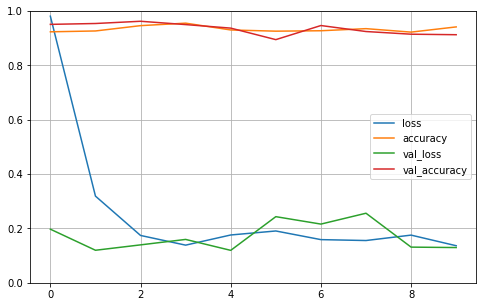

In [64]:
pd.DataFrame(history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Model test using own data

In [24]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    image = imread(filename)
    pyplot.imshow(image)
    pyplot.show()
    return img

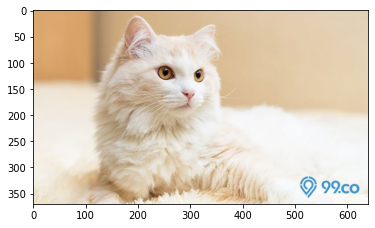

In [26]:
img = load_image('owntest/kucing-anggora.jpg')

In [27]:
# predict the class
result = model.predict(img)
print(result[0])

[0.]


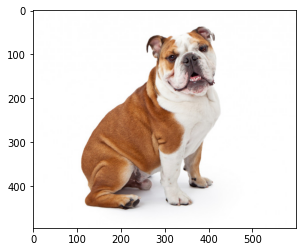

In [28]:
img = load_image('owntest/bulldog.jpg')

In [33]:
result = model.predict(img)
print(result[0])

[1.]


In [32]:
result.argmax(axis=-1)

array([0], dtype=int64)

In [38]:
# Check File Size

folder='kagglecatsanddogs_3367a/PetImages/Dog/'
for file in listdir(folder):
    size=os.path.getsize(folder+file) / 1000
    if size<=1:
        print(str(size)+" KB - "+file)

0.986 KB - 11686.jpg
0.0 KB - 11702.jpg


In [5]:
count_test=0
count_train=0
for file in listdir(dataset_home+'/test/dogs/'):
    count_test=count_test+1

for file in listdir(dataset_home+'/train/dogs/'):
    count_train=count_train+1

print('count test: '+str(count_test))
print('count train: '+str(count_train))

count test: 3185
count train: 9314


# Evaluate Model

d:\installation\python38-64\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 93.606


AttributeError: 'dict' object has no attribute 'history'

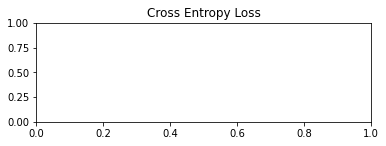

In [66]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)